In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/sunil/OneDrive/Desktop/sonia_folder/Sample_project/sales.csv")

In [3]:
df = data.drop(["Invoice ID", "Branch", "Tax 5%", "gross margin percentage", "gross income"], axis = 1)

In [4]:
df1 = df.groupby("Product line").count()

### Q.1 Which product line sells the most number of products?

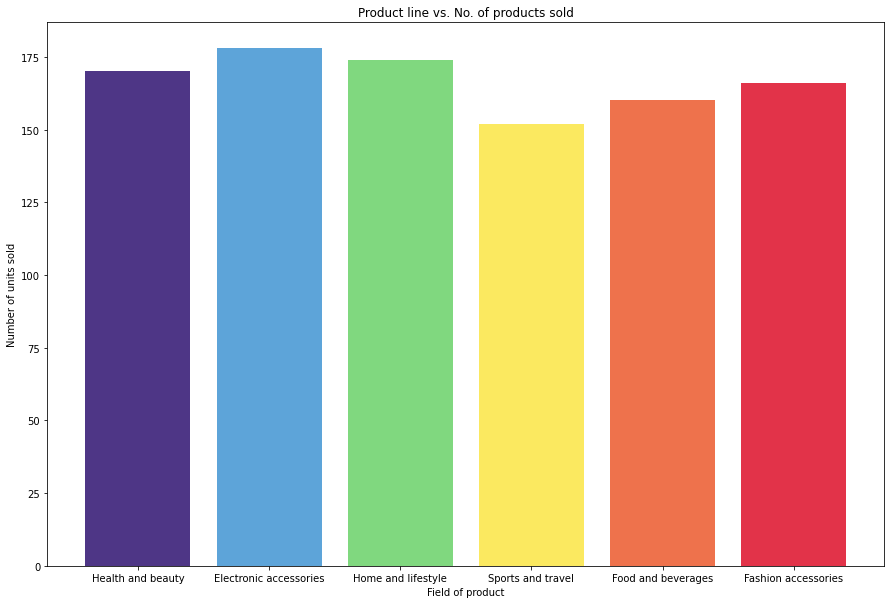

In [5]:
prods = ('Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories')
plt.figure(figsize=(15,10))
plt.title("Product line vs. No. of products sold")
plt.xlabel('Field of product')
plt.ylabel('Number of units sold')
plt.bar(prods, df1["Quantity"], color = ['#4E3686', '#5DA4D9', '#80D87F', '#FBE960', '#EE724C', '#E23349'])
plt.show()

From the bar graph above, we can see that Electronic accessories seems to be the product line that sells the most number of products.

### Q.2 What is the best advertising time? 

In [6]:
#creating a column for time 
df["time_of_day"] = df["Time"].str[:2]

In [7]:
df2 = df.groupby("time_of_day").count()

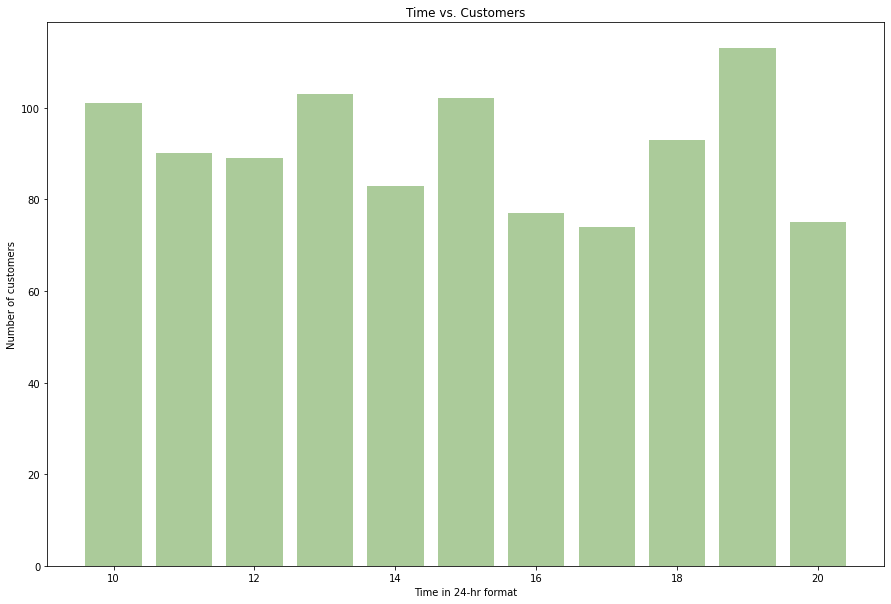

In [8]:
time = range(10, 21)
plt.figure(figsize=(15,10))
plt.title("Time vs. Customers")
plt.xlabel('Time in 24-hr format')
plt.ylabel('Number of customers')
plt.bar(time, df2["Customer type"], color=['#ABCB9A'])
plt.show()

The best possible time for advertising will be the busiest hour of the day. The graph above clearly shows us that the shop is most busy at 1900 hrs. and moderately busy during the mid-afternoons. 

### Q.3 Which gender should store membership be promoted to?  

In [9]:
member = df.loc[df["Customer type"] == "Member"]
f = member.loc[member["Gender"] == "Female"].count()[0]
m = member.loc[member["Gender"] == "Male"].count()[0]

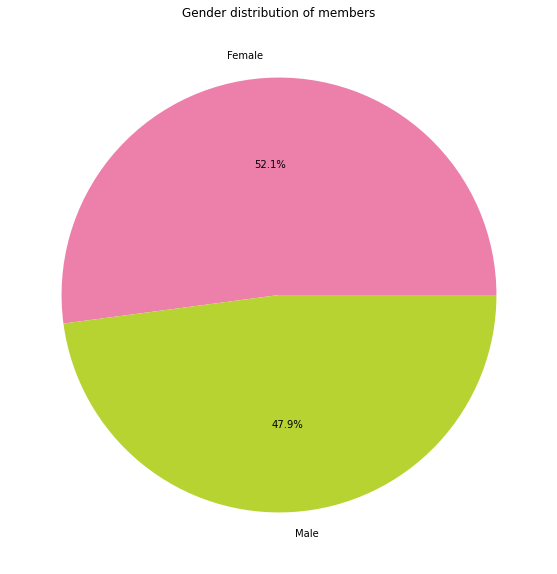

In [10]:
labels = ["Female", "Male"]
plt.figure(figsize=(15,10))
colors = ['#ED80AA', '#B7D332']
plt.title("Gender distribution of members")
plt.pie([f, m], labels = labels, autopct='%1.1f%%', colors = colors)
plt.show()

The pie chart shows us that women are more likely to agree to a store membership.

### Q.4 Who should each product be marketed to (based on gender)?

In [11]:
health = df.loc[df["Product line"] == "Health and beauty"]
healthf = health.loc[health["Gender"] == "Female"].count()[0]
healthm = health.loc[health["Gender"] == "Male"].count()[0]

electric = df.loc[df["Product line"] == "Electronic accessories"]
electricf = electric.loc[electric["Gender"] == "Female"].count()[0]
electricm = electric.loc[electric["Gender"] == "Male"].count()[0]

home = df.loc[df["Product line"] == "Home and lifestyle"]
homef = home.loc[home["Gender"] == "Female"].count()[0]
homem = home.loc[home["Gender"] == "Male"].count()[0]

Sport = df.loc[df["Product line"] == "Sports and travel"]
Sportf = Sport.loc[Sport["Gender"] == "Female"].count()[0]
Sportm = Sport.loc[Sport["Gender"] == "Male"].count()[0]

food = df.loc[df["Product line"] == "Food and beverages"]
foodf = food.loc[food["Gender"] == "Female"].count()[0]
foodm = food.loc[food["Gender"] == "Male"].count()[0]

fashion = df.loc[df["Product line"] == "Fashion accessories"]
fashionf = fashion.loc[fashion["Gender"] == "Female"].count()[0]
fashionm = fashion.loc[fashion["Gender"] == "Male"].count()[0]

f = [healthf, electricf, homef, Sportf, foodf, fashionf]
m = [healthm, electricm, homem, Sportm, foodm, fashionm]

In [12]:
import matplotlib.patches as mpat

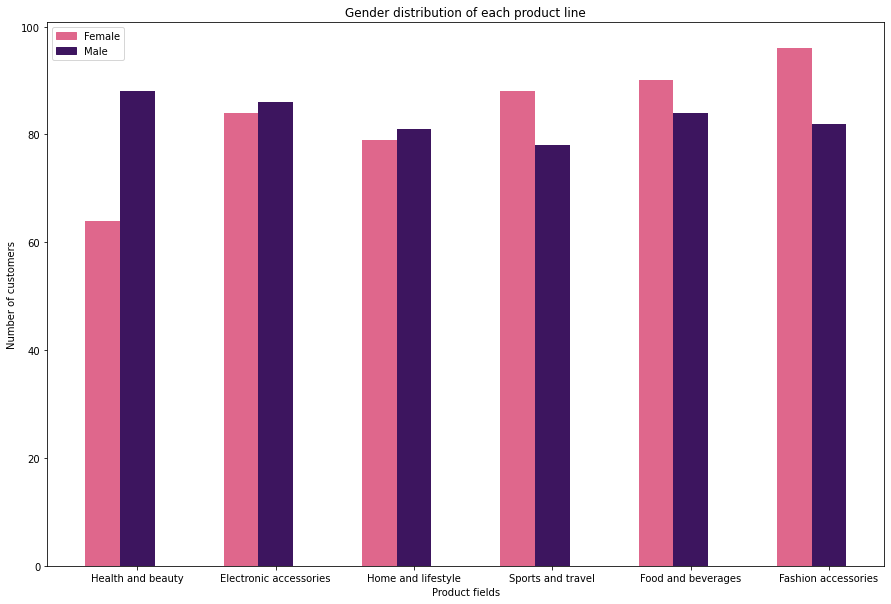

In [13]:
x = np.arange(len(f))
barw = 0.25
plt.figure(figsize=(15,10))
plt.bar(x+barw, f, width = barw, color = "#DF678C", zorder=2)
plt.bar(x+barw*2, m, width = barw, color = "#3D155F", zorder=2)
plt.xticks(x+barw*2, ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages','Fashion accessories'])

plt.title("Gender distribution of each product line")
plt.xlabel('Product fields')
plt.ylabel('Number of customers')

#legend
c1 = mpat.Patch(color="#DF678C", label="Female")
c2 = mpat.Patch(color="#3D155F", label="Male")
plt.legend(handles = [c1, c2])

plt.show()

The graph clearly outlines the gender distribution for each of the product fields.

### Q.5 Does price pay a role in the number of products sold?

In [14]:
%matplotlib inline

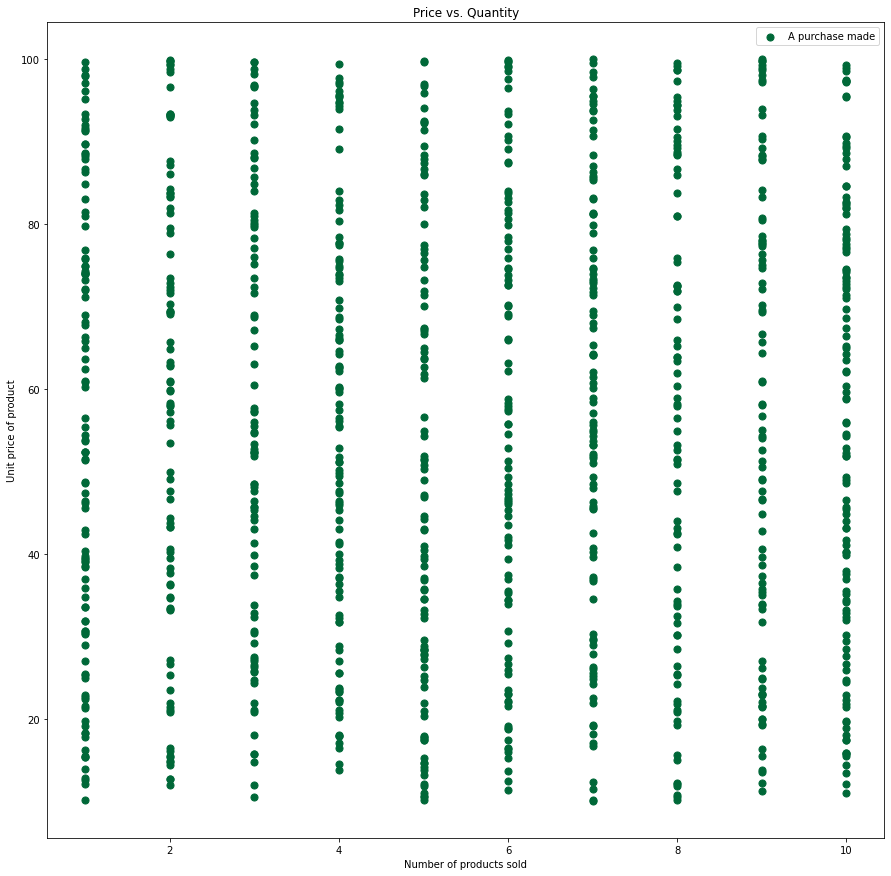

In [31]:
plt.figure(figsize=(15,15))
plt.title("Price vs. Quantity")
plt.ylabel('Unit price of product')
plt.xlabel('Number of products sold')
plt.scatter (df["Quantity"], df["Unit price"], color = "#006838", s=50)
plt.legend(["A purchase made"])
plt.show()

There is no clear co-relation between the quantity of products sold and their pricing.

### Q.6 Does each gender have a preferred mode of payment ?

In [16]:
ew = df.loc[df["Payment"] == "Ewallet"]
ewf = ew.loc[ew["Gender"] == "Female"].count()[0]
ewm = ew.loc[ew["Gender"] == "Male"].count()[0]

c = df.loc[df["Payment"] == "Cash"]
cf = c.loc[c["Gender"] == "Female"].count()[0]
cm = c.loc[c["Gender"] == "Male"].count()[0]

cr = df.loc[df["Payment"] == "Credit card"]
crf = cr.loc[cr["Gender"] == "Female"].count()[0]
crm = cr.loc[cr["Gender"] == "Male"].count()[0]

In [17]:
typ = ['Ewallet', 'Cash', 'Credit card']
w = [ewf, cf, crf]
nw = [ewm, cm, crm]

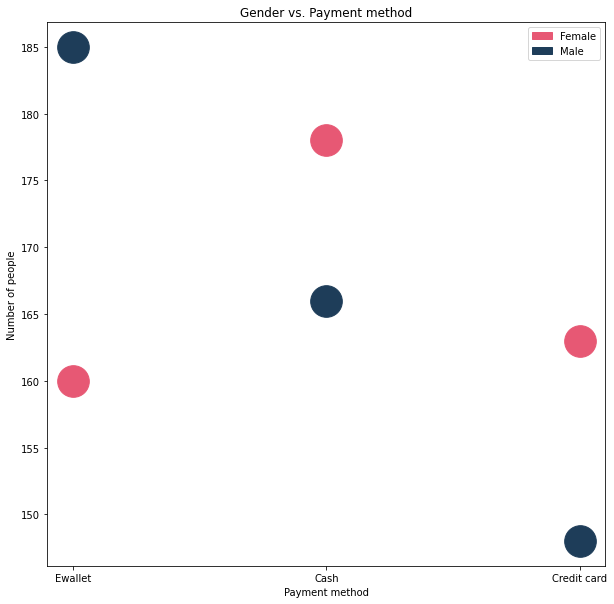

In [18]:
plt.figure(figsize=(10,10))
plt.title("Gender vs. Payment method")
plt.xlabel('Payment method')
plt.ylabel('Number of people')
c1 = mpat.Patch(color="#e75874", label="Female")
c2 = mpat.Patch(color="#1e3d59", label="Male")
plt.legend(handles = [c1, c2])

plt.scatter(x= typ, y= w, color='#e75874', s=1000)    
plt.scatter(x= typ, y= nw, color='#1e3d59', s=1000) 
plt.show()

The graph clearly shows us that men prefer the method of Ewallets as a mode of payment, whereas women prefer to pay in cash. Also, the least preferred mode of payment is seen to be Credit cards. 

### Q.7 What offers should be presented to each type of customer to boost sales?

In [19]:
health = df.loc[df["Product line"] == "Health and beauty"]
healthf = health.loc[health["Customer type"] == "Member"].count()[0]
healthm = health.loc[health["Customer type"] == "Normal"].count()[0]

electric = df.loc[df["Product line"] == "Electronic accessories"]
electricf = electric.loc[electric["Customer type"] == "Member"].count()[0]
electricm = electric.loc[electric["Customer type"] == "Normal"].count()[0]

home = df.loc[df["Product line"] == "Home and lifestyle"]
homef = home.loc[home["Customer type"] == "Member"].count()[0]
homem = home.loc[home["Customer type"] == "Normal"].count()[0]

Sport = df.loc[df["Product line"] == "Sports and travel"]
Sportf = Sport.loc[Sport["Customer type"] == "Member"].count()[0]
Sportm = Sport.loc[Sport["Customer type"] == "Normal"].count()[0]

food = df.loc[df["Product line"] == "Food and beverages"]
foodf = food.loc[food["Customer type"] == "Member"].count()[0]
foodm = food.loc[food["Customer type"] == "Normal"].count()[0]

fashion = df.loc[df["Product line"] == "Fashion accessories"]
fashionf = fashion.loc[fashion["Customer type"] == "Member"].count()[0]
fashionm = fashion.loc[fashion["Customer type"] == "Normal"].count()[0]

f = [healthf, electricf, homef, Sportf, foodf, fashionf]
m = [healthm, electricm, homem, Sportm, foodm, fashionm]

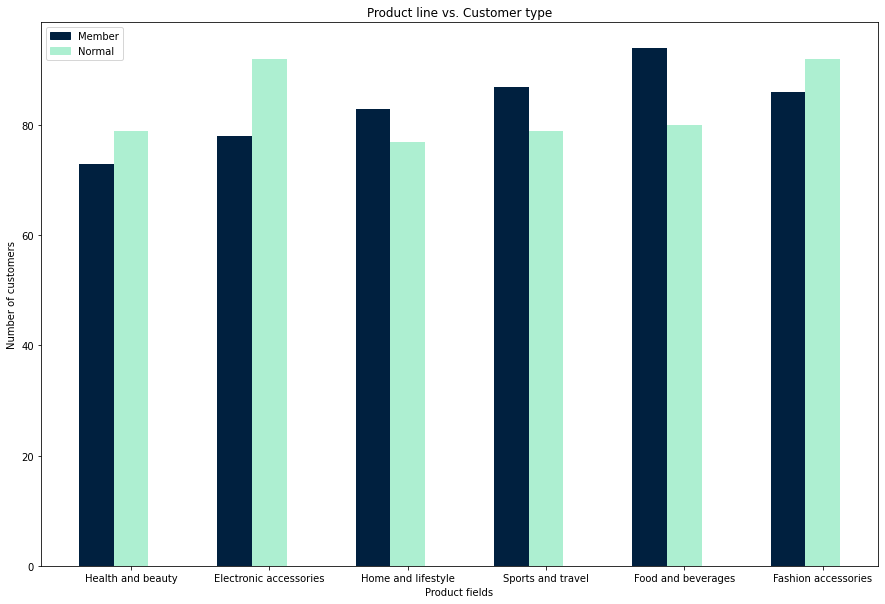

In [20]:
x = np.arange(len(f))
barw = 0.25
plt.figure(figsize=(15,10))
plt.bar(x+barw, f, width = barw, color = "#00203FFF", zorder=2)
plt.bar(x+barw*2, m, width = barw, color = "#ADEFD1FF", zorder=2)
plt.xticks(x+barw*2, ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages','Fashion accessories'])

plt.title("Product line vs. Customer type")
plt.xlabel('Product fields')
plt.ylabel('Number of customers')

#legend
c1 = mpat.Patch(color="#00203FFF", label="Member")
c2 = mpat.Patch(color="#ADEFD1FF", label="Normal")
plt.legend(handles = [c1, c2])

plt.show()

Offers and discounts pertaining to the "health and Beauty" products can be extended to Members of the store - since the number of member-customers purchasing these products are low.

Similarly, special offers for Food and beverages can be awarded to non-members.

### Q.8 What products are best sold in each branch?

In [21]:
A = df.loc[df["City"] == "Mandalay"]
healthA = A.loc[A["Product line"] == "Health and beauty"].count()[0]
electricA = A.loc[A["Product line"] == "Electronic accessories"].count()[0]
homeA = A.loc[A["Product line"] == "Home and lifestyle"].count()[0]
SportA = A.loc[A["Product line"] == "Sports and travel"].count()[0]
foodA = A.loc[A["Product line"] == "Food and beverages"].count()[0]
fashionA = A.loc[A["Product line"] == "Fashion accessories"].count()[0]

B = df.loc[df["City"] == "Naypyitaw"]
healthB = B.loc[B["Product line"] == "Health and beauty"].count()[0]
electricB = B.loc[B["Product line"] == "Electronic accessories"].count()[0]
homeB = B.loc[B["Product line"] == "Home and lifestyle"].count()[0]
SportB = B.loc[B["Product line"] == "Sports and travel"].count()[0]
foodB = B.loc[B["Product line"] == "Food and beverages"].count()[0]
fashionB = B.loc[B["Product line"] == "Fashion accessories"].count()[0]

C = df.loc[df["City"] == "Yangon"]
healthC = C.loc[C["Product line"] == "Health and beauty"].count()[0]
electricC = C.loc[C["Product line"] == "Electronic accessories"].count()[0]
homeC = C.loc[C["Product line"] == "Home and lifestyle"].count()[0]
SportC = C.loc[C["Product line"] == "Sports and travel"].count()[0]
foodC = C.loc[C["Product line"] == "Food and beverages"].count()[0]
fashionC = C.loc[C["Product line"] == "Fashion accessories"].count()[0]

In [22]:
prod = ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']
y1 = [healthA, electricA, homeA, SportA, foodA, fashionA]
y2 = [healthB, electricB, homeB, SportB, foodB, fashionB]
y3 = [healthC, electricC, homeC, SportC, foodC, fashionC]

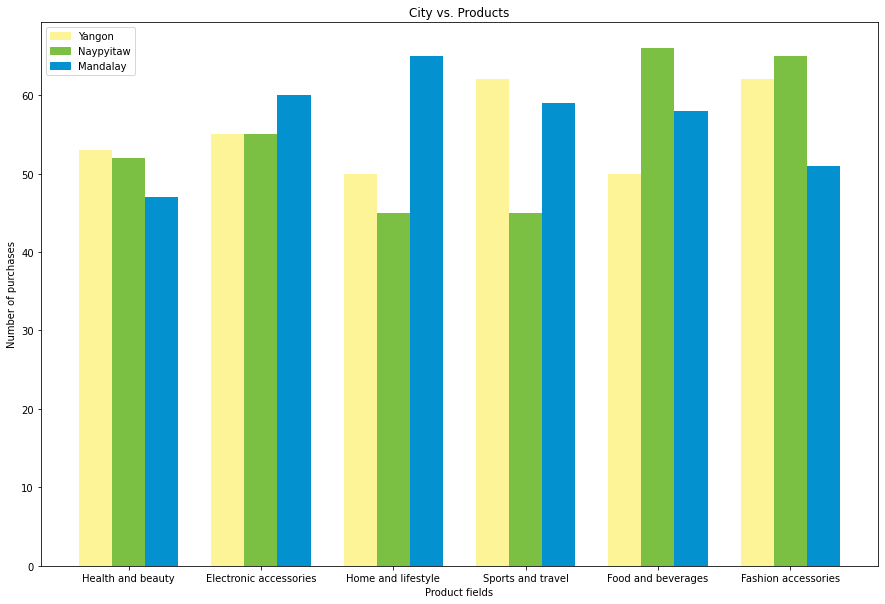

In [24]:
x = np.arange(len(y1))
barw = 0.25
plt.figure(figsize=(15,10))
plt.bar(x+barw, y1, width = barw, color = "#fdf498", zorder=2)
plt.bar(x+barw*2, y2, width = barw, color = "#7bc043", zorder=2)
plt.bar(x+barw*3, y3, width = barw, color = "#0392cf", zorder=2)

plt.xticks(x+barw*2, ['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages','Fashion accessories'])

plt.title("City vs. Products")
plt.xlabel('Product fields')
plt.ylabel('Number of purchases')

#legend
c1 = mpat.Patch(color="#fdf498", label="Yangon")
c2 = mpat.Patch(color="#7bc043", label="Naypyitaw")
c3 = mpat.Patch(color="#0392cf", label="Mandalay")
plt.legend(handles = [c1, c2, c3])

plt.show()

In the field of "Health and beauty" Yangon does best.<br>
In the field of "Electronic accessories" Mandalay does the best.<br>
In the field of "Home and lifestyle" Mandalay does the best.<br>
In the field of "Sports and travel" Yangon does best.<br>
In the field of "Food and beverages" Naypyitaw has the highest number of purchases.<br>
In the field of "Fashion accessories" Naypyitaw does best.

### Q.9 Which branch has the best sales?

In [26]:
df["month"] = df["Date"].str[:2]
df['month'] = df['month'].replace(['1/'],'01')
df['month'] = df['month'].replace(['2/'],'02')
df['month'] = df['month'].replace(['3/'],'03')

M1 = df.loc[df["month"] == "01"]
a1 = M1.loc[M1["City"] == "Mandalay"].sum()[6]
b1 = M1.loc[M1["City"] == "Naypyitaw"].sum()[6]
c1 = M1.loc[M1["City"] == "Yangon"].sum()[6]

M2 = df.loc[df["month"] == "02"]
a2 = M2.loc[M2["City"] == "Mandalay"].sum()[6]
b2 = M2.loc[M2["City"] == "Naypyitaw"].sum()[6]
c2 = M2.loc[M2["City"] == "Yangon"].sum()[6]

M3 = df.loc[df["month"] == "03"]
a3 = M3.loc[M3["City"] == "Mandalay"].sum()[6]
b3 = M3.loc[M3["City"] == "Naypyitaw"].sum()[6]
c3 = M3.loc[M3["City"] == "Yangon"].sum()[6]

In [27]:
months = ["January", "February", "March"]
y1 = [a1, b1, c1]
y2 = [a2, b2, c2]
y3 = [a3, b3, c3]

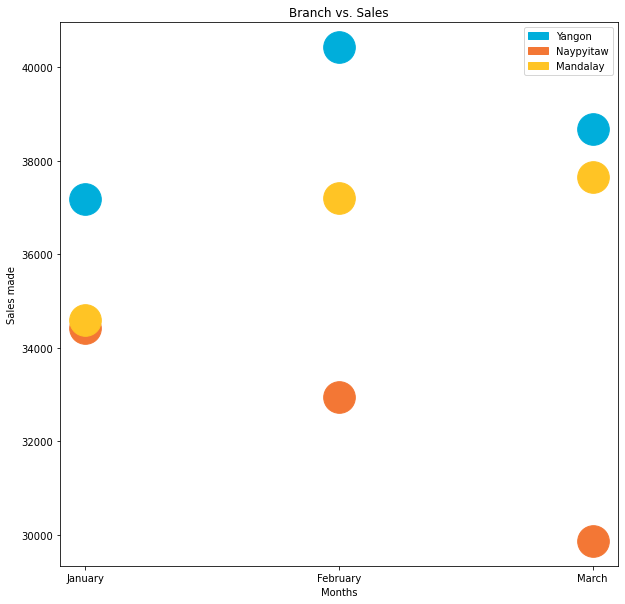

In [28]:
plt.figure(figsize=(10,10))
plt.title("Branch vs. Sales")
plt.xlabel('Months')
plt.ylabel('Sales made')
c1 = mpat.Patch(color="#00aedb", label="Yangon")
c2 = mpat.Patch(color="#f37735", label="Naypyitaw")
c3 = mpat.Patch(color="#ffc425", label="Mandalay")
plt.legend(handles = [c1, c2, c3])

plt.scatter(x= months, y= y1, color='#00aedb', s=1000)    
plt.scatter(x= months, y= y2, color='#f37735', s=1000)
plt.scatter(x= months, y= y3, color='#ffc425', s=1000)
plt.show()

From the above graph, we can clearly see that the Yangon branch has the best sales throughout the months.

### Q.10  Which branch tends to be visited by high-spending customers?

In [32]:
A = df.loc[df["City"] == "Mandalay"]

B = df.loc[df["City"] == "Naypyitaw"]

C = df.loc[df["City"] == "Yangon"]

m1 = A.loc[A["Customer type"] == "Member"].mean()["Total"]
n1 = A.loc[A["Customer type"] == "Normal"].mean()["Total"]

m2 = B.loc[B["Customer type"] == "Member"].mean()["Total"]
n2 = B.loc[B["Customer type"] == "Normal"].mean()["Total"]

m3 = C.loc[C["Customer type"] == "Member"].mean()["Total"]
n3 = C.loc[C["Customer type"] == "Normal"].mean()["Total"]

In [33]:
city = ['Yangon', 'Naypyitaw', 'Mandalay']
z1 = [m1, m2, m3]
z2 = [n1, n2, n3]

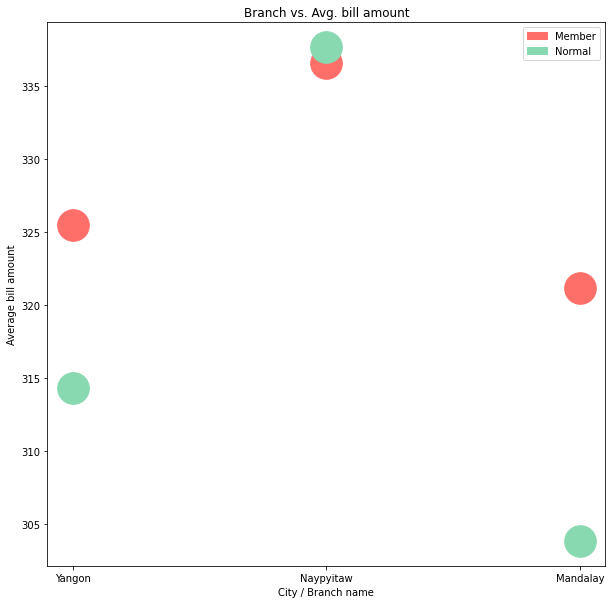

In [34]:
plt.figure(figsize=(10,10))
plt.title("Branch vs. Avg. bill amount")
plt.xlabel('City / Branch name')
plt.ylabel('Average bill amount')
c1 = mpat.Patch(color="#ff6f69", label="Member")
c2 = mpat.Patch(color="#88d8b0", label="Normal")
plt.legend(handles = [c1, c2])

plt.scatter(x= city, y= z1, color='#ff6f69', s=1000)    
plt.scatter(x= city, y= z2, color='#88d8b0', s=1000)
plt.show()

From the plot above, we can see that Naypyitaw has the highest paying customers.

SONIA VAKAYIL